-------------------------------------------
                 DataFrame                 
-------------------------------------------
Target: target

-------------------------------------------
                    HEAD                   
-------------------------------------------
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   

-------------------------------------------
                    INFO                   
-----------

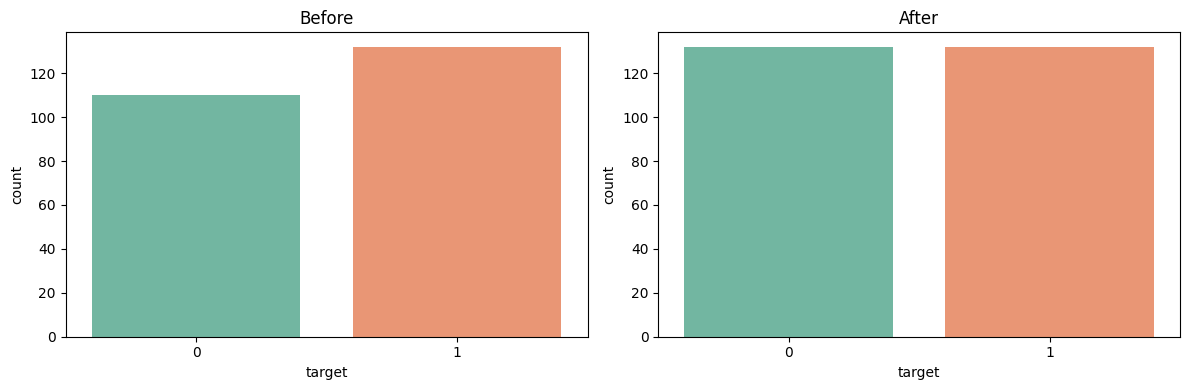

make apply = True if NEEDS PCA?:
-------------------------------------------
                PCA CANCELED               
-------------------------------------------
-------------------------------------------
        VISUALIZING DATA - DataFrame       
-------------------------------------------


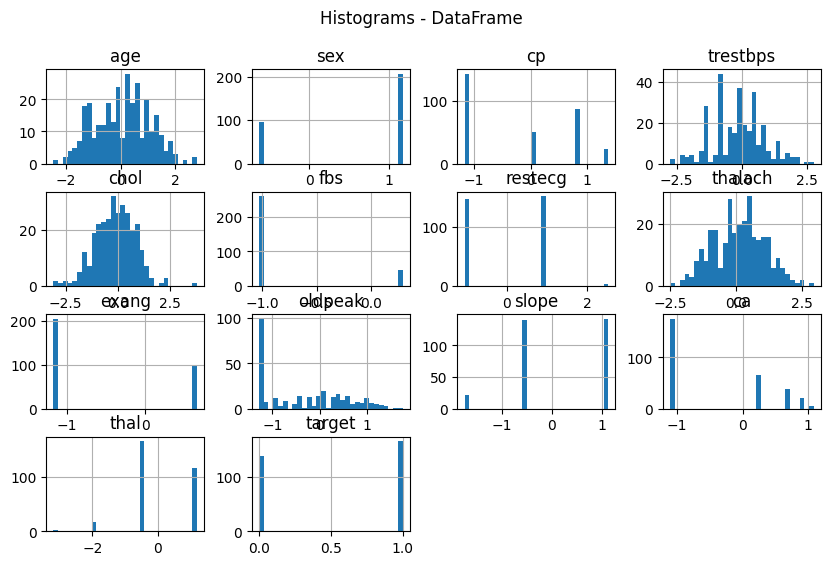

-------------------------------------------
              MODEL SELECTION              
-------------------------------------------
Fitting 10 folds for each of 9 candidates, totalling 90 fits

Logistic Regression (GridSearch)
Best Params: {'C': 10, 'l1_ratio': 0.7}
Best CV Score: 0.8640

Sorted Model Performance:
Logistic Regression: 0.8640

Best Model: Logistic Regression
-------------------------------------------
              MODEL EVALUATION             
-------------------------------------------
-------------------------------------------
Evaluating model: best_model
-------------------------------------------

Evaluating model: best_model
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75      

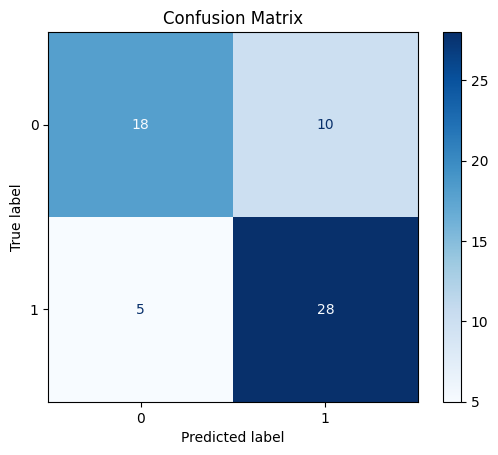

In [3]:
import pandas as pd
from Class_Source import MachineLearning
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , RandomForestClassifier

df = pd.read_csv("Heart Disease Dataset.csv")
project = MachineLearning(df=df , target='target' , classification=True)
# --------------Display Data----------------
project.display_data()
# --------------Missing Values Handling----------------
project.handle_missing_values(impute_strategy="median")
# --------------Outliers Detection----------------
project.outliers_detection(box_plot=False)
# --------------Feature Scaling----------------
project.scaling_features(scaling_method="standard" , kde_plot=False)
# --------------Handle Skewness----------------
project.handle_skewness(threshold=0 , kde_plot=False)
# --------------Split Data----------------
project.split_data(classification=True , test_size=0.2 , random_state=85)
# --------------Imbalance Handling----------------
project.imbalance_handling(apply=True ,method="smote")
# --------------Feature Selection----------------
project.pca(apply=False)
# --------------Data Visualization----------------
project.visualize_data(histogram=True)
# ---------------Model Dictionary----------------
models_dict = {
    "Logistic Regression": {
        "model": LogisticRegression(
            solver='saga',
            penalty='elasticnet',
            max_iter=1000
        ),
        "params": {
            "C": [0.23, 1, 10],
            "l1_ratio": [0.7, 0.8, 0.9]
        }
    }
}
# ---------------Model Selection(Cross Validation)----------------
best_model, sorted_results = project.model_selection(models_dict=models_dict, print_results=True , ascending=True ,scoring="accuracy" , cv=10 , grid_search=True , verbose=1)
# ---------------Model Training & Evaluation----------------
project.model_Training_evaluation(models_dict={"best_model": best_model} , classification=True , classification_report=True)
# ---------------Model Visualization----------------
project.model_visualization(models_dict={"best_model": best_model} , classification=True)